In [10]:
import sdf
from sdf.mesh import _cartesian_product, _estimate_bounds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import sys
import os
iglpath = os.path.normpath("./libigl-python-bindings/out/build/x64-Release/")
if os.path.exists(iglpath):
    sys.path.insert(0, os.path.abspath(iglpath))
else:
    raise ModuleNotFoundError('pyigl not found')
import pyigl as igl

def show_sdf_at_z(file, z_level=0, step=0.01, offset=30, nums=100, sign_type=4):

    v,f = igl.read_triangle_mesh(file)
    bv, bf = igl.bounding_box(v)

    dx, dy, dz = (step,)*3
    (x0, y0, z0), (x1, y1, z1) = bv[0], bv[-1]

    X = np.linspace(x0-offset*dx, x1+offset*dx, nums)
    Y = np.linspace(y0-offset*dy, y1+offset*dy, nums)
    Z = np.array([z_level])

    P = _cartesian_product(X, Y, Z)
    df = pd.DataFrame(P, columns = ['X', 'Y', 'Z'])
    
    df['sdf'], _, _ = igl.signed_distance(P, v, f, sign_type, return_normals=False)
    df['sdf'] = -df['sdf']
    print('Local: ', np.min(df['sdf']), np.max(df['sdf']))

    pv_df = df.pivot('X', 'Y', 'sdf')
    c = sns.heatmap(pv_df, cmap='coolwarm', center=0)
    c.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.2f}'))
    c.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.2f}'))
    plt.show()

    # S, _, _ = igl.signed_distance(pts, v, f, sign_type=igl.SIGNED_DISTANCE_TYPE_FAST_WINDING_NUMBER)

In [7]:
f = sdf.sphere(1)
points = f.generate(step=0.01, verbose=True, method=1)
sdf.write_binary_stl('sphere_1.stl', points)

min -1.17859, -1.17859, -1.17859
max 1.17859, 1.17859, 1.17859
step 0.01, 0.01, 0.01

376956 triangles in 0.712 seconds


Local:  -1.8373192215162057 1.7748953010027064


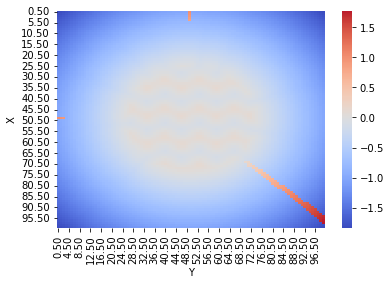

Local:  -1.8373192215162057 0.1124352978031881


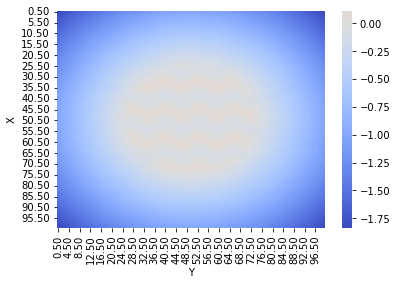

Local:  -1.8373192215162057 0.11243529780318821


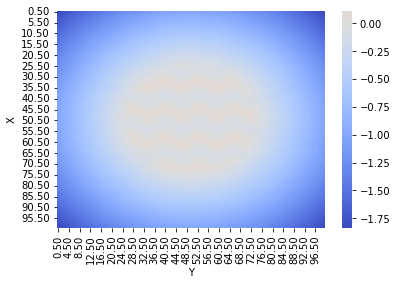

Local:  -1.8371871669347215 0.11333206113207658


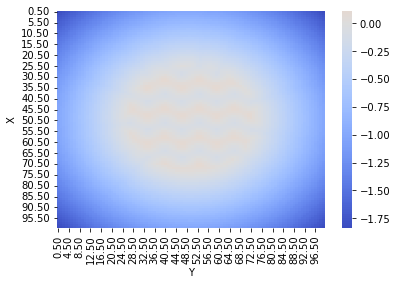

In [9]:
for i in [0,1,2,4]:
    show_sdf_at_z('gyroid_w12.stl', 0, step=0.1, sign_type=i)

Local:  -3.0356539079782183 0.464201639823811


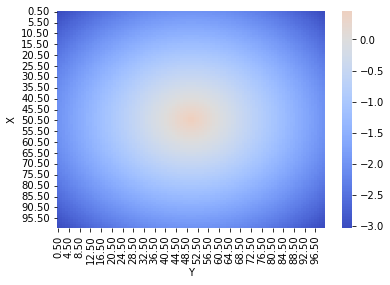

Local:  -3.0356539079782183 0.4642016398238121


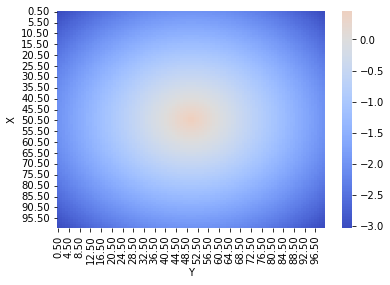

Local:  -3.035575195826084 0.4651229478932076


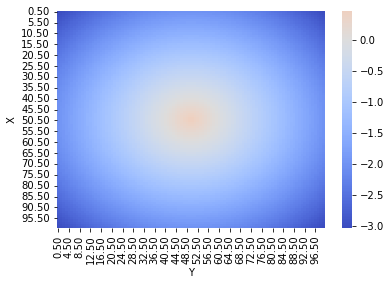

In [11]:
for i in [1,2,4]:
    show_sdf_at_z('sphere_1.stl', 0, step=0.1, sign_type=i)